In [8]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

### PreProcess Data

In [27]:
train_labels = []
train_samples= []

 - fake data generated on experimental drug tested on individuals aged 13 to 100
 - trial has 2100 participants, half under 65 and half over 65
 - 95% of patients 65 or older experienced side effects
 - 95% of patients under 65 had no side effects

In [28]:
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

In [12]:
for i in train_samples:
    print(i)

22
38
95
52
67
23
97
22
65
25
77
58
96
36
73
34
82
33
93
30
86
64
88
61
88
39
66
43
69
23
66
21
68
46
85
44
69
34
91
34
81
23
85
58
91
49
75
63
95
13
98
38
67
37
94
53
71
27
78
56
66
51
79
55
87
20
77
33
87
29
74
47
66
42
77
16
68
57
70
49
98
23
94
46
76
48
69
26
96
39
82
63
70
21
73
18
99
55
67
62
87
17
73
59
66
38
81
62
89
22
84
16
79
41
67
60
70
50
85
61
69
22
75
13
75
63
84
41
100
43
73
33
93
38
68
20
92
27
99
26
77
51
74
30
100
21
75
19
90
42
80
61
71
35
70
55
99
62
78
40
83
32
84
63
99
14
100
38
66
54
87
24
84
28
83
16
79
16
67
41
79
48
74
60
89
63
95
42
84
33
91
62
88
57
74
52
96
47
75
16
81
62
76
40
79
47
82
16
70
20
88
43
73
61
95
32
87
24
97
24
83
32
89
38
77
35
95
56
83
27
83
24
94
37
83
60
81
26
79
17
96
34
95
52
99
26
68
55
70
30
76
46
80
61
71
27
78
35
78
19
85
48
92
62
98
52
89
62
79
58
95
28
86
49
93
38
92
64
91
17
71
45
88
51
87
29
85
53
78
22
85
38
69
36
79
61
70
37
98
40
83
59
94
60
75
49
99
24
98
54
94
45
87
13
97
41
82
37
65
43
73
14
80
33
77
28
70
15
91
29
92
40
9

In [35]:
train_labels = np.array(train_labels, dtype='float64')
train_samples = np.array(train_samples, dtype='float64')

In [54]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scalar.fit_transform((train_samples).reshape(-1,1))

In [55]:
for i in scalar_train_samples:
    print(i)

[0.]
[0.67816092]
[0.12643678]
[0.88505747]
[0.47126437]
[0.91954023]
[0.31034483]
[0.94252874]
[0.]
[0.85057471]
[0.08045977]
[0.73563218]
[0.32183908]
[0.63218391]
[0.04597701]
[0.67816092]
[0.1954023]
[0.89655172]
[0.36781609]
[1.]
[0.52873563]
[0.79310345]
[0.29885057]
[0.86206897]
[0.48275862]
[1.]
[0.57471264]
[0.6091954]
[0.50574713]
[0.63218391]
[0.02298851]
[0.82758621]
[0.]
[0.90804598]
[0.24137931]
[0.64367816]
[0.4137931]
[0.64367816]
[0.01149425]
[0.79310345]
[0.18390805]
[0.93103448]
[0.27586207]
[0.96551724]
[0.11494253]
[0.7816092]
[0.3908046]
[0.91954023]
[0.12643678]
[0.70114943]
[0.33333333]
[0.73563218]
[0.5862069]
[0.74712644]
[0.10344828]
[0.89655172]
[0.27586207]
[0.93103448]
[0.37931034]
[0.70114943]
[0.08045977]
[0.73563218]
[0.05747126]
[0.82758621]
[0.13793103]
[0.70114943]
[0.01149425]
[0.70114943]
[0.57471264]
[0.91954023]
[0.50574713]
[0.97701149]
[0.22988506]
[0.93103448]
[0.27586207]
[0.68965517]
[0.11494253]
[0.98850575]
[0.12643678]
[0.6091954]
[0.1724

[0.33333333]
[0.83908046]
[0.1954023]
[0.95402299]
[0.48275862]
[0.81609195]
[0.2183908]
[0.81609195]
[0.13793103]
[0.65517241]
[0.22988506]
[1.]
[0.17241379]
[0.68965517]
[0.2183908]
[0.79310345]
[0.25287356]
[0.74712644]
[0.48275862]
[0.7816092]
[0.1954023]
[0.77011494]
[0.08045977]
[0.79310345]
[0.36781609]
[0.64367816]
[0.37931034]
[0.6091954]
[0.09195402]
[0.66666667]
[0.18390805]
[0.73563218]
[0.55172414]
[0.93103448]
[0.2183908]
[0.96551724]
[0.36781609]
[0.86206897]
[0.22988506]
[0.87356322]
[0.14942529]
[0.74712644]
[0.43678161]
[0.75862069]
[0.06896552]
[0.89655172]
[0.36781609]
[0.97701149]
[0.28735632]
[0.71264368]
[0.12643678]
[0.96551724]
[0.01149425]
[0.73563218]
[0.3908046]
[0.81609195]
[0.28735632]
[0.82758621]
[0.22988506]
[0.93103448]
[0.09195402]
[0.88505747]
[0.47126437]
[0.71264368]
[0.1954023]
[0.88505747]
[0.54022989]
[0.87356322]
[0.43678161]
[0.79310345]
[0.29885057]
[0.74712644]
[0.4137931]
[0.64367816]
[0.08045977]
[0.71264368]
[0.44827586]
[0.67816092]
[0.3

### Creating 3 Layer Network

In [56]:
# model accepts an array, where each element is a layer
# can add layesr in the constructor
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# of can add one layer at a time
# model = Sequential();
# model.add(l2)....

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(
    Adam(lr=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [59]:
model.fit(scaled_train_samples, train_labels, batch_size=20, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
 - 0s - loss: 0.6691 - acc: 0.5262
Epoch 2/10
 - 0s - loss: 0.6555 - acc: 0.5786
Epoch 3/10
 - 0s - loss: 0.6394 - acc: 0.6319
Epoch 4/10
 - 0s - loss: 0.6244 - acc: 0.6814
Epoch 5/10
 - 0s - loss: 0.6097 - acc: 0.7000
Epoch 6/10
 - 0s - loss: 0.5944 - acc: 0.7338
Epoch 7/10
 - 0s - loss: 0.5786 - acc: 0.7524
Epoch 8/10
 - 0s - loss: 0.5622 - acc: 0.7686
Epoch 9/10
 - 0s - loss: 0.5452 - acc: 0.7871
Epoch 10/10
 - 0s - loss: 0.5281 - acc: 0.8038


### Make Predictions

In [61]:
# should make a test test, but we're just going to fake this and re-use training data
test_samples = scaled_train_samples
test_labels = train_labels
predictions = model.predict(test_samples, batch_size=10, verbose=0)

In [65]:
# rounded predictions will store value with highest probability
rounded_predictions = model.predict_classes(test_samples, batch_size=10, verbose=0)

In [68]:
# using scikit-learn to plot a confusion matrix
# comparing rounded_predictions to test_labels
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [69]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [70]:
cm

array([[ 692,  358],
       [  35, 1015]])

- plot_confusion_matrix taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 692  358]
 [  35 1015]]


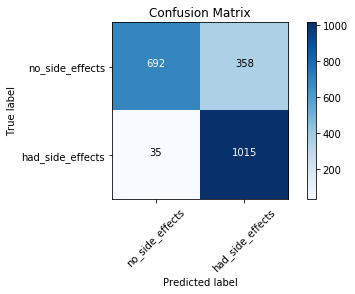

In [72]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')